In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.cosmology import Planck18
import fitsio

In [2]:
k = Table.read('/pscratch/sd/z/zhaozhon/DATASET/DESI-data/k.csv',format='csv')
indice = np.isnan(k['k_gg']) | np.isinf(k['k_gg']) | np.isnan(k['k_rr']) | np.isinf(k['k_rr'])
k_gg = k['k_gg'][~indice]
k_rr = k['k_rr'][~indice]
# Calculate the fraction of data that remains
fraction_remaining = len(k_gg) / len(k['k_gg'])
print(f"Fraction of data that remained: {fraction_remaining:.2f}")

Fraction of data that remained: 1.00


In [3]:
file = '/pscratch/sd/z/zhaozhon/DATASET/DESI-data/new_d.fits'
d = Table(fitsio.read(file))
SEL = np.where((d['Z'] > 2.3) & (d['Z'] < 2.8))[0]
apr_mag_g = d['APP_MAG_G'][SEL][~indice]
apr_mag_g_err = d['APP_MAGERR_G'][SEL][~indice]
apr_mag_r = d['APP_MAG_R'][SEL][~indice]
apr_mag_r_err = d['APP_MAGERR_R'][SEL][~indice]
z = d['Z'][SEL][~indice]

In [4]:
d = Planck18.distmod(z).value

In [5]:
print(np.std(apr_mag_r))
print(np.std(apr_mag_r-d))
print(np.std(apr_mag_r-d-k_rr))
print(np.std(d))
print(np.std(k_rr))

1.0389214
1.0561658304144665
1.06070398546465
0.14660841093590674
0.08614084433075973


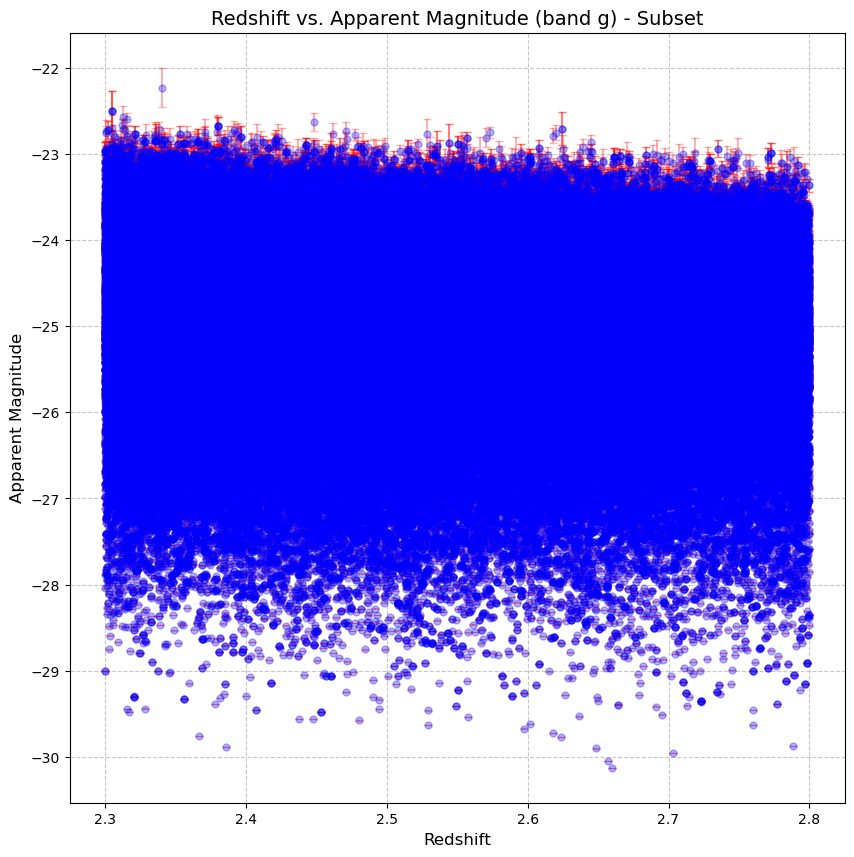

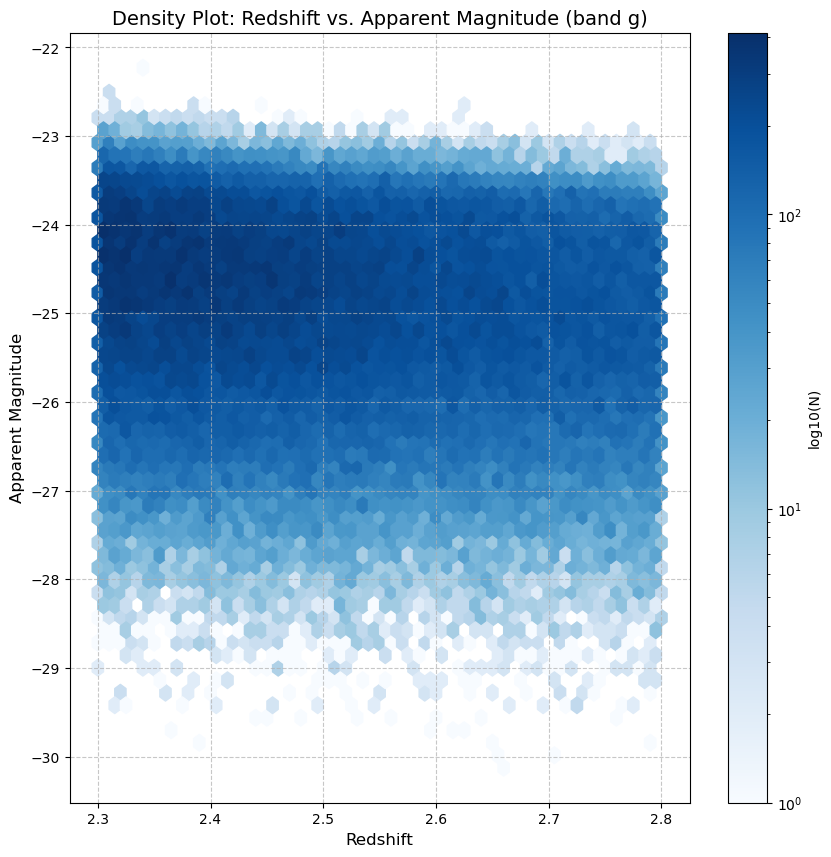

In [6]:
plt.figure(figsize=(10, 10))
plt.errorbar(z, apr_mag_g-d, yerr=apr_mag_g_err, fmt='o', color='blue', ecolor='red', capsize=3, markersize=5, alpha=0.3)
plt.title('Redshift vs. Apparent Magnitude (band g) - Subset', fontsize=14)
plt.xlabel('Redshift', fontsize=12)
plt.ylabel('Apparent Magnitude', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('/global/u1/z/zhaozhon/Plots/apr_mag_g', dpi=300)  # Saving the errorbar plot

# Creating and saving the hexbin plot
plt.figure(figsize=(10, 10))
plt.hexbin(z, apr_mag_g-d, gridsize=50, cmap='Blues', bins='log')
plt.colorbar(label='log10(N)')
plt.title('Density Plot: Redshift vs. Apparent Magnitude (band g)', fontsize=14)
plt.xlabel('Redshift', fontsize=12)
plt.ylabel('Apparent Magnitude', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('/global/u1/z/zhaozhon/Plots/apr_mag_g_density', dpi=300)  # Saving the hexbin plot

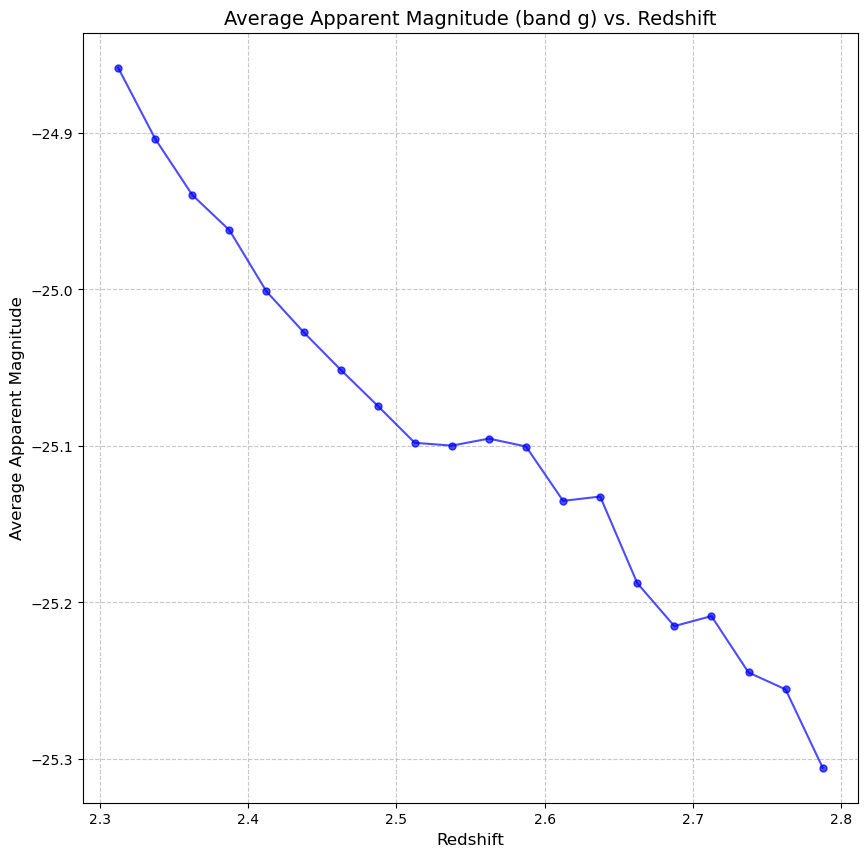

In [7]:
# Define the bins
num_bins = 20
bins = np.linspace(min(z), max(z), num_bins + 1)

# Digitize the data into bins
bin_indices = np.digitize(z, bins)

# Calculate the average magnitude for each bin
avg_magnitude = []
for i in range(1, num_bins + 1):
    bin_mask = (bin_indices == i)
    if np.any(bin_mask):  # Check if there are elements in the bin
        avg_magnitude.append(np.mean(apr_mag_g[bin_mask] - d[bin_mask]))
    else:
        avg_magnitude.append(np.nan)  # If no elements in the bin, append NaN

# Plotting the average magnitude for each bin
bin_centers = (bins[:-1] + bins[1:]) / 2

plt.figure(figsize=(10, 10))
plt.errorbar(bin_centers, avg_magnitude, fmt='o', color='blue', capsize=3, markersize=5, alpha=0.7, linestyle='-')
plt.title('Average Apparent Magnitude (band g) vs. Redshift', fontsize=14)
plt.xlabel('Redshift', fontsize=12)
plt.ylabel('Average Apparent Magnitude', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('/global/u1/z/zhaozhon/Plots/avg_apr_mag_g', dpi=300)  # Saving the plot

# Showing the plot
plt.show()

In [8]:
print(max(avg_magnitude)-min(avg_magnitude))

0.44731956046974375


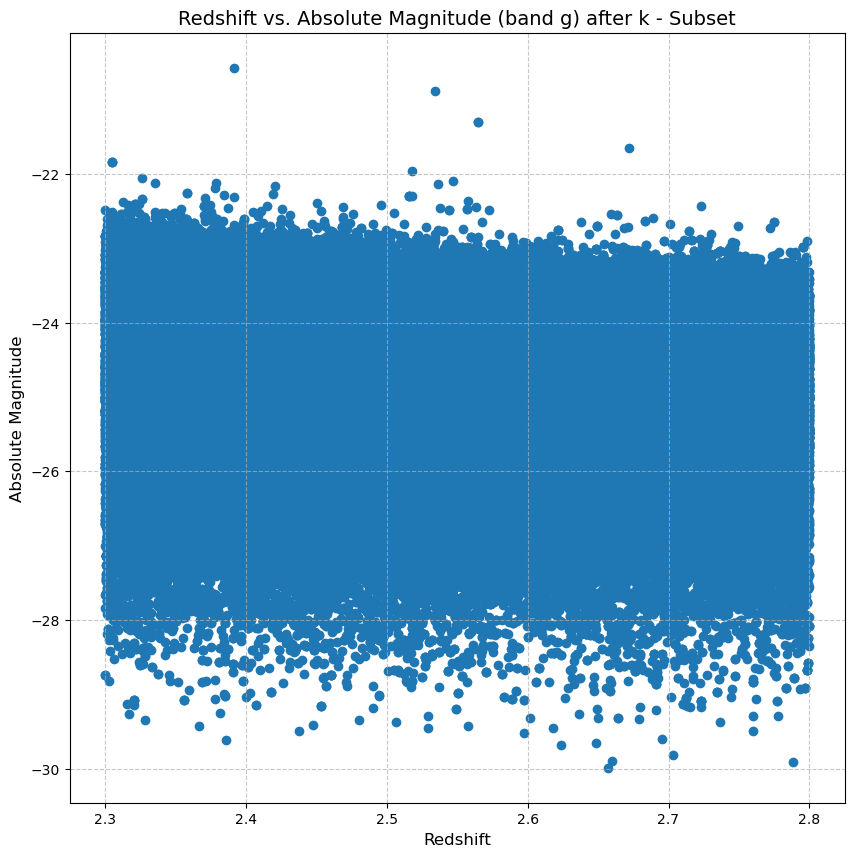

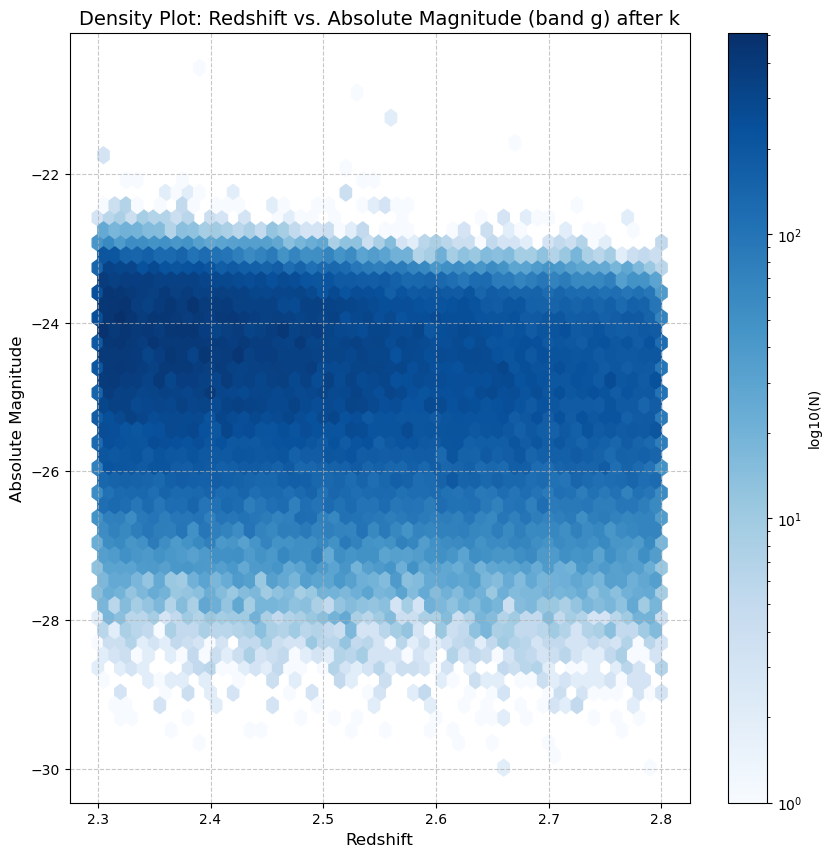

In [9]:
plt.figure(figsize=(10, 10))
plt.scatter(z, apr_mag_g-d-k_gg)
plt.title('Redshift vs. Absolute Magnitude (band g) after k - Subset', fontsize=14)
plt.xlabel('Redshift', fontsize=12)
plt.ylabel('Absolute Magnitude', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('/global/u1/z/zhaozhon/Plots/after_k_g', dpi=300)  # Saving the errorbar plot

# Creating and saving the hexbin plot
plt.figure(figsize=(10, 10))
plt.hexbin(z, apr_mag_g-d-k_gg, gridsize=50, cmap='Blues', bins='log')
plt.colorbar(label='log10(N)')
plt.title('Density Plot: Redshift vs. Absolute Magnitude (band g) after k', fontsize=14)
plt.xlabel('Redshift', fontsize=12)
plt.ylabel('Absolute Magnitude', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('/global/u1/z/zhaozhon/Plots/after_k_density_g', dpi=300)  # Saving the hexbin plot


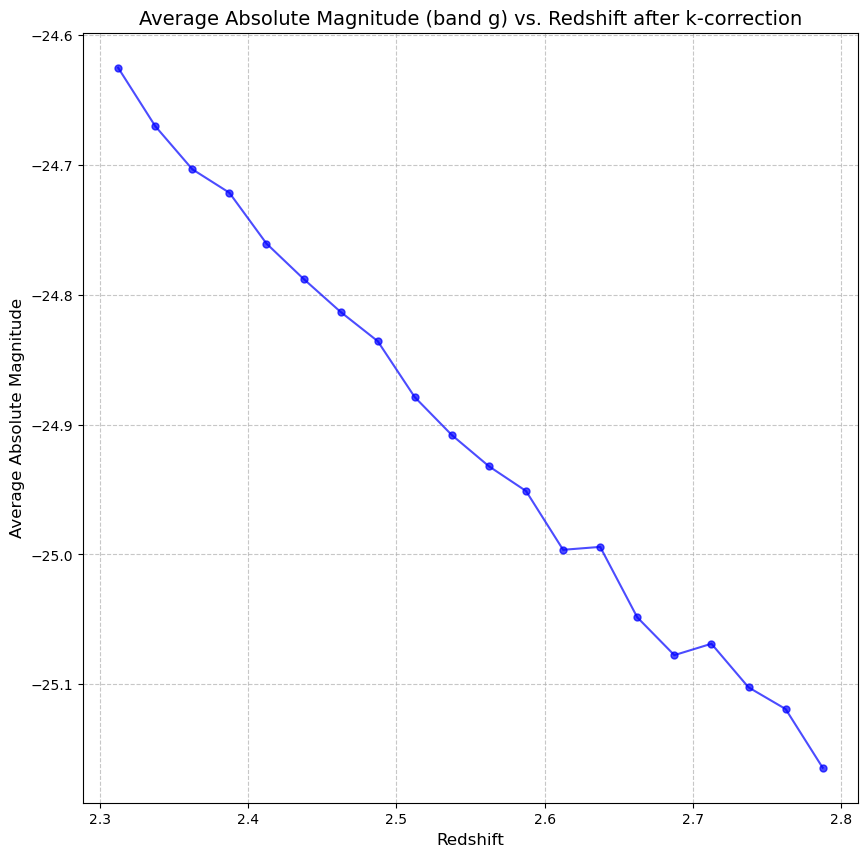

In [10]:
# Define the bins
num_bins = 20
bins = np.linspace(min(z), max(z), num_bins + 1)

# Digitize the data into bins
bin_indices = np.digitize(z, bins)

# Calculate the average absolute magnitude for each bin
avg_absolute_magnitude = []
for i in range(1, num_bins + 1):
    bin_mask = (bin_indices == i)
    if np.any(bin_mask):  # Check if there are elements in the bin
        avg_absolute_magnitude.append(np.mean(apr_mag_g[bin_mask] - d[bin_mask] - k_gg[bin_mask]))
    else:
        avg_absolute_magnitude.append(np.nan)  # If no elements in the bin, append NaN

# Plotting the average absolute magnitude for each bin
bin_centers = (bins[:-1] + bins[1:]) / 2

plt.figure(figsize=(10, 10))
plt.errorbar(bin_centers, avg_absolute_magnitude, fmt='o', color='blue', capsize=3, markersize=5, alpha=0.7, linestyle='-')
plt.title('Average Absolute Magnitude (band g) vs. Redshift after k-correction', fontsize=14)
plt.xlabel('Redshift', fontsize=12)
plt.ylabel('Average Absolute Magnitude', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('/global/u1/z/zhaozhon/Plots/avg_abs_mag_g', dpi=300)  # Saving the plot

# Showing the plot
plt.show()

In [11]:
print(max(avg_absolute_magnitude)-min(avg_absolute_magnitude))

0.538966543387847


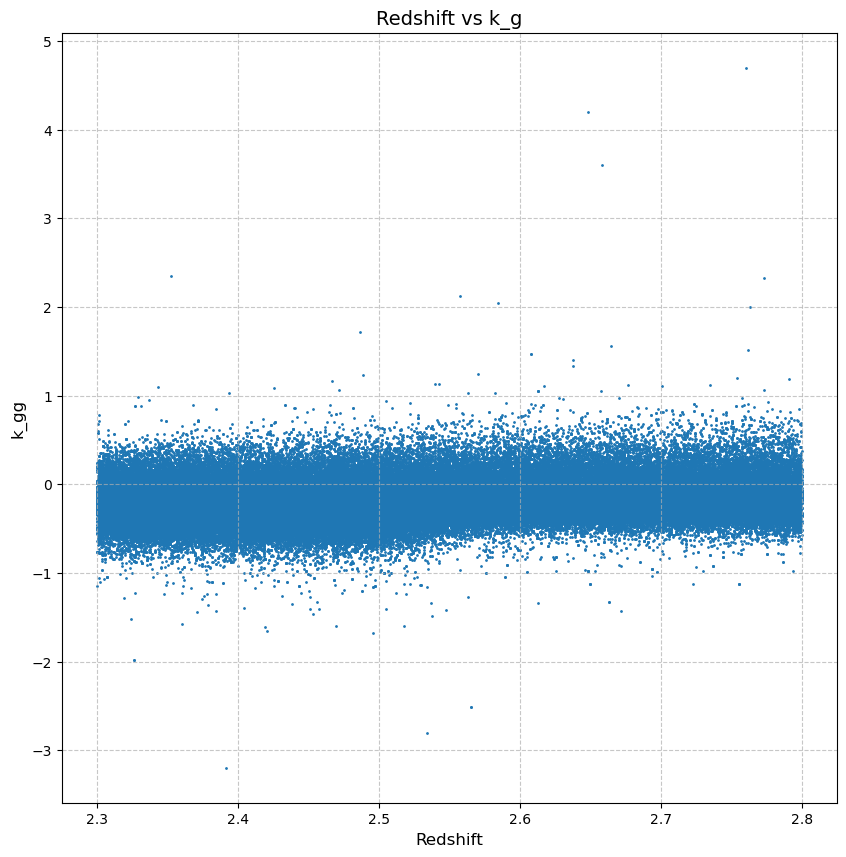

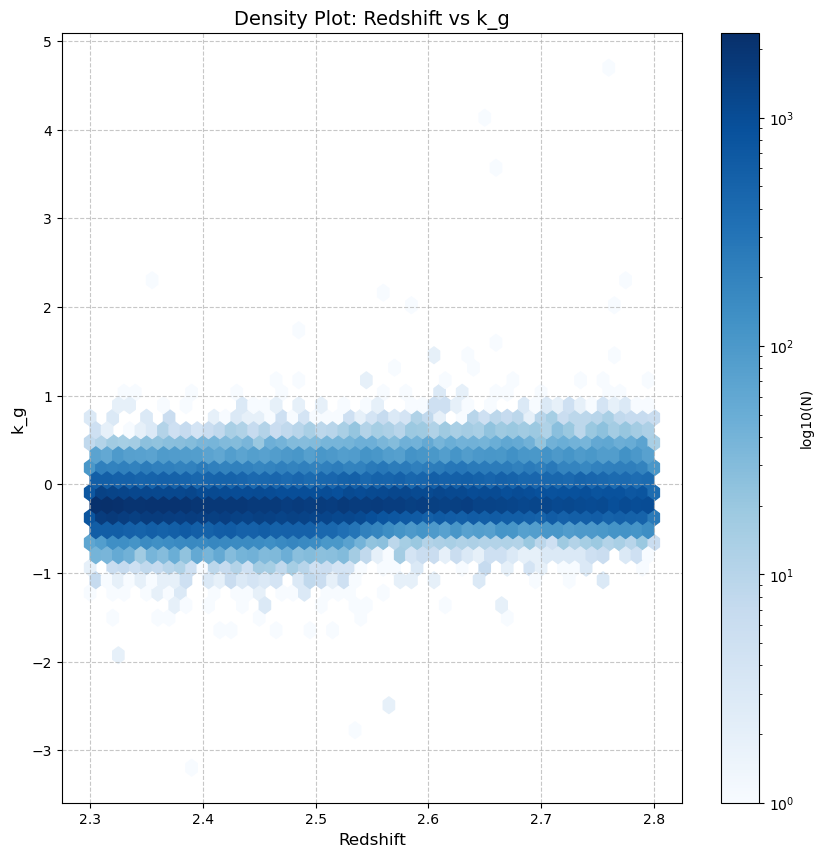

In [12]:
plt.figure(figsize=(10, 10))
plt.scatter(z, k_gg,s=1)
plt.title('Redshift vs k_g', fontsize=14)
plt.xlabel('Redshift', fontsize=12)
plt.ylabel('k_gg', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('/global/u1/z/zhaozhon/Plots/k_g1', dpi=300)  # Saving the errorbar plot

# Creating and saving the hexbin plot
plt.figure(figsize=(10, 10))
plt.hexbin(z, k_gg, gridsize=50, cmap='Blues', bins='log')
plt.colorbar(label='log10(N)')
plt.title('Density Plot: Redshift vs k_g', fontsize=14)
plt.xlabel('Redshift', fontsize=12)
plt.ylabel('k_g', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('/global/u1/z/zhaozhon/Plots/k_g2', dpi=300)  # Saving the hexbin plot

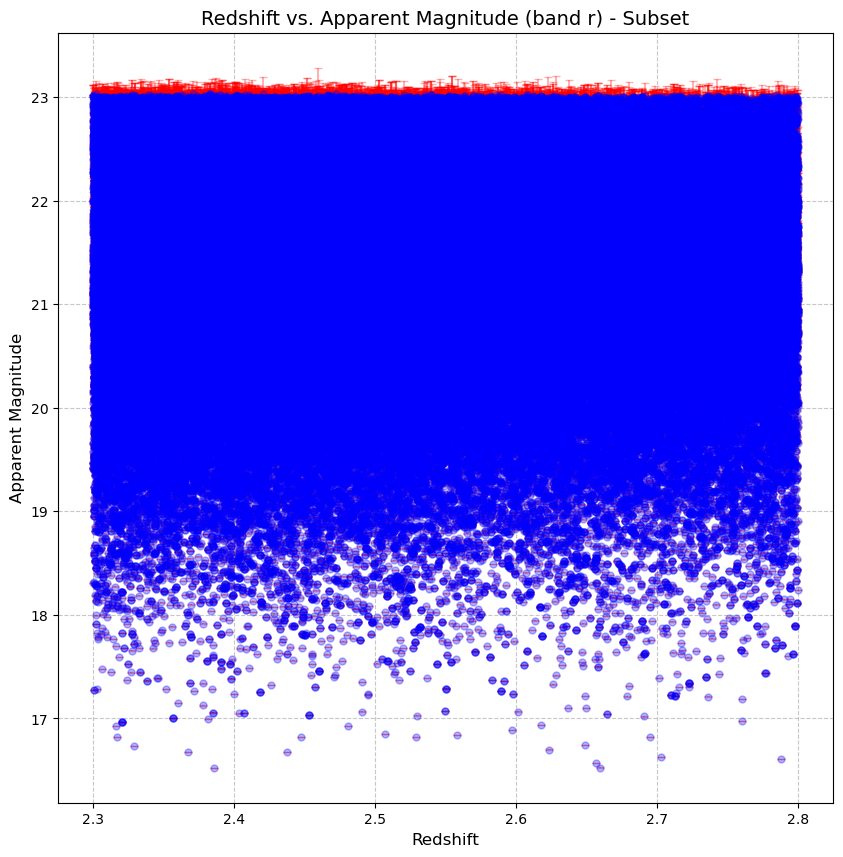

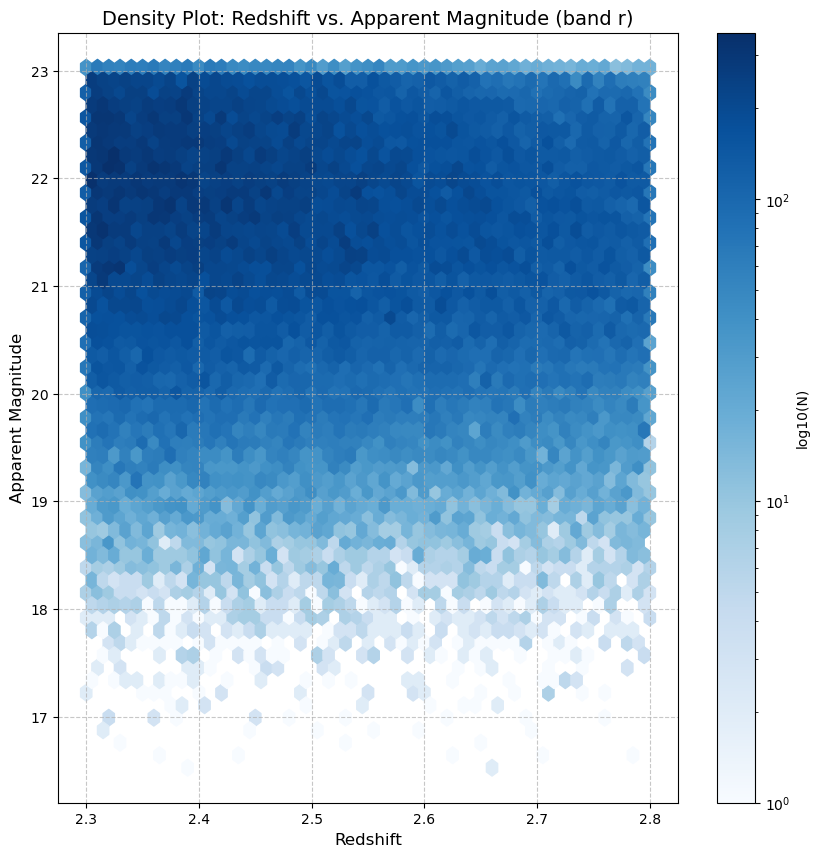

In [13]:
plt.figure(figsize=(10, 10))
plt.errorbar(z, apr_mag_r, yerr=apr_mag_r_err, fmt='o', color='blue', ecolor='red', capsize=3, markersize=5, alpha=0.3)
plt.title('Redshift vs. Apparent Magnitude (band r) - Subset', fontsize=14)
plt.xlabel('Redshift', fontsize=12)
plt.ylabel('Apparent Magnitude', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('/global/u1/z/zhaozhon/Plots/apr_mag_r', dpi=300)  # Saving the errorbar plot

# Creating and saving the hexbin plot
plt.figure(figsize=(10, 10))
plt.hexbin(z, apr_mag_r, gridsize=50, cmap='Blues', bins='log')
plt.colorbar(label='log10(N)')
plt.title('Density Plot: Redshift vs. Apparent Magnitude (band r)', fontsize=14)
plt.xlabel('Redshift', fontsize=12)
plt.ylabel('Apparent Magnitude', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('/global/u1/z/zhaozhon/Plots/apr_mag_r_density', dpi=300)  # Saving the hexbin plot

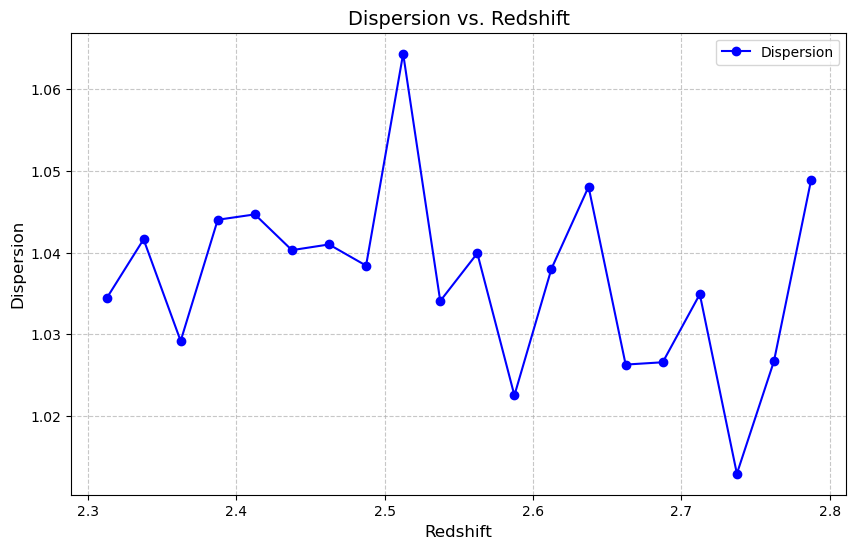

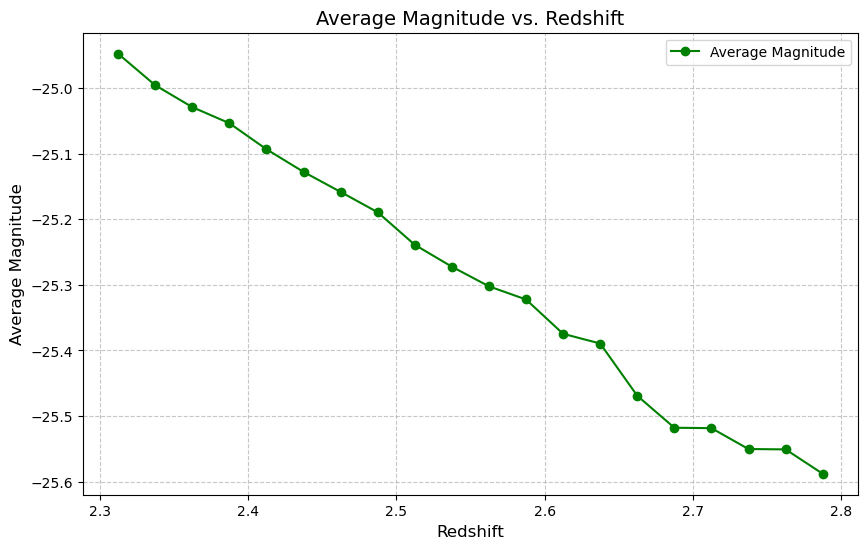

Bin 1: Center=2.31, Average=-24.95, Dispersion=1.03
Bin 2: Center=2.34, Average=-25.00, Dispersion=1.04
Bin 3: Center=2.36, Average=-25.03, Dispersion=1.03
Bin 4: Center=2.39, Average=-25.05, Dispersion=1.04
Bin 5: Center=2.41, Average=-25.09, Dispersion=1.04
Bin 6: Center=2.44, Average=-25.13, Dispersion=1.04
Bin 7: Center=2.46, Average=-25.16, Dispersion=1.04
Bin 8: Center=2.49, Average=-25.19, Dispersion=1.04
Bin 9: Center=2.51, Average=-25.24, Dispersion=1.06
Bin 10: Center=2.54, Average=-25.27, Dispersion=1.03
Bin 11: Center=2.56, Average=-25.30, Dispersion=1.04
Bin 12: Center=2.59, Average=-25.32, Dispersion=1.02
Bin 13: Center=2.61, Average=-25.37, Dispersion=1.04
Bin 14: Center=2.64, Average=-25.39, Dispersion=1.05
Bin 15: Center=2.66, Average=-25.47, Dispersion=1.03
Bin 16: Center=2.69, Average=-25.52, Dispersion=1.03
Bin 17: Center=2.71, Average=-25.52, Dispersion=1.03
Bin 18: Center=2.74, Average=-25.55, Dispersion=1.01
Bin 19: Center=2.76, Average=-25.55, Dispersion=1.03
Bi

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of bins for redshift
num_bins = 20
bin_edges = np.linspace(min(z), max(z), num_bins + 1)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])  # Midpoints of each bin

# Arrays to store average magnitude and dispersion
average_apr_magnitude = []
dispersion_apr_magnitude = []

# Loop through each redshift bin
for i in range(num_bins):
    # Select data points in the current bin
    bin_mask = (z >= bin_edges[i]) & (z < bin_edges[i + 1])
    bin_values = (apr_mag_r - d)[bin_mask]
    
    # Calculate average magnitude and dispersion
    if len(bin_values) > 0:
        average_apr_magnitude.append(np.mean(bin_values))
        dispersion_apr_magnitude.append(np.std(bin_values))
    else:
        # Handle empty bins
        average_apr_magnitude.append(np.nan)
        dispersion_apr_magnitude.append(np.nan)

# Plotting Dispersion vs. Redshift
plt.figure(figsize=(10, 6))
plt.plot(bin_centers, dispersion_apr_magnitude, marker='o', linestyle='-', color='blue', label='Dispersion')
plt.title('Dispersion vs. Redshift', fontsize=14)
plt.xlabel('Redshift', fontsize=12)
plt.ylabel('Dispersion', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.savefig('/global/u1/z/zhaozhon/Plots/dispersion_vs_redshift', dpi=300)
plt.show()

# Plotting Average Magnitude vs. Redshift
plt.figure(figsize=(10, 6))
plt.plot(bin_centers, average_apr_magnitude, marker='o', linestyle='-', color='green', label='Average Magnitude')
plt.title('Average Magnitude vs. Redshift', fontsize=14)
plt.xlabel('Redshift', fontsize=12)
plt.ylabel('Average Magnitude', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.savefig('/global/u1/z/zhaozhon/Plots/average_vs_redshift', dpi=300)
plt.show()

# Print Summary for Each Bin
for i in range(num_bins):
    print(f"Bin {i+1}: Center={bin_centers[i]:.2f}, Average={average_apr_magnitude[i]:.2f}, Dispersion={dispersion_apr_magnitude[i]:.2f}")

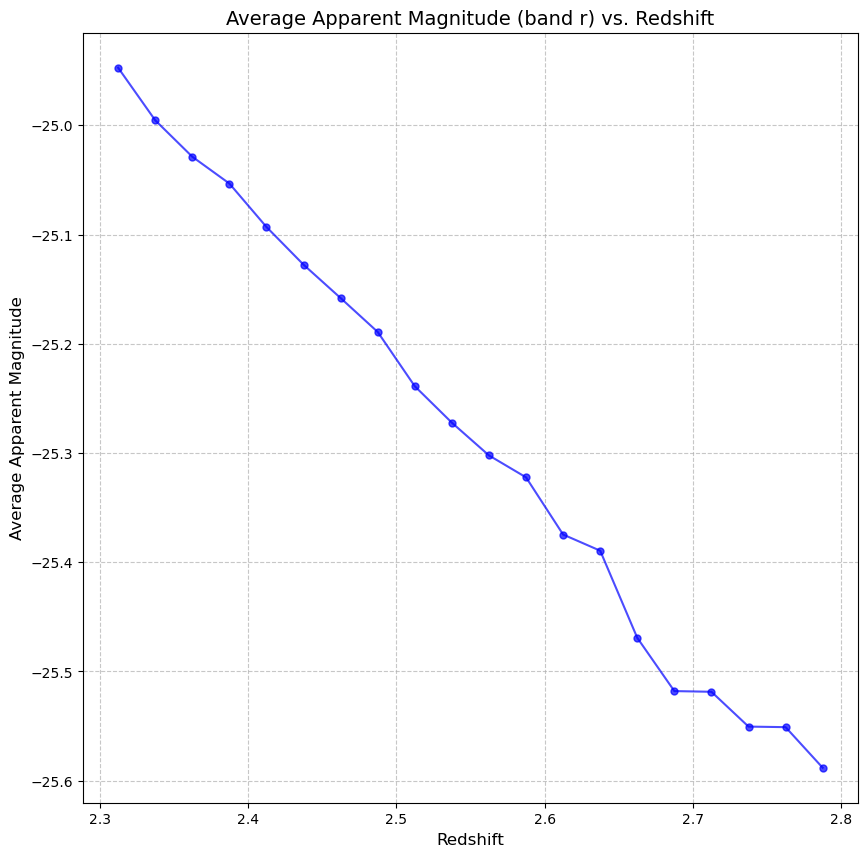

In [18]:
# Define the bins
num_bins = 20
bins = np.linspace(min(z), max(z), num_bins + 1)

# Digitize the data into bins
bin_indices = np.digitize(z, bins)

# Calculate the average magnitude for each bin
avg_magnitude = []
for i in range(1, num_bins + 1):
    bin_mask = (bin_indices == i)
    if np.any(bin_mask):  # Check if there are elements in the bin
        avg_magnitude.append(np.mean(apr_mag_r[bin_mask] - d[bin_mask]))
    else:
        avg_magnitude.append(np.nan)  # If no elements in the bin, append NaN

# Plotting the average magnitude for each bin
bin_centers = (bins[:-1] + bins[1:]) / 2

plt.figure(figsize=(10, 10))
plt.errorbar(bin_centers, avg_magnitude, fmt='o', color='blue', capsize=3, markersize=5, alpha=0.7, linestyle='-')
plt.title('Average Apparent Magnitude (band r) vs. Redshift', fontsize=14)
plt.xlabel('Redshift', fontsize=12)
plt.ylabel('Average Apparent Magnitude', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('/global/u1/z/zhaozhon/Plots/avg_apr_mag_r', dpi=300)  # Saving the plot

# Showing the plot
plt.show()

In [19]:
print(max(avg_magnitude)-min(avg_magnitude))

0.6409104450342795


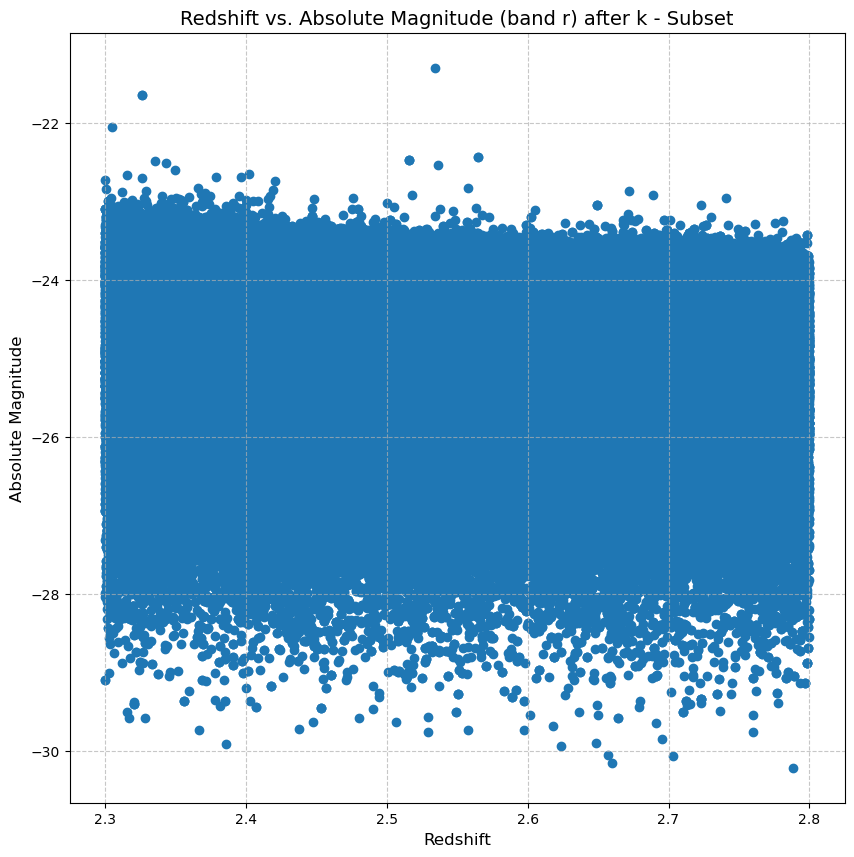

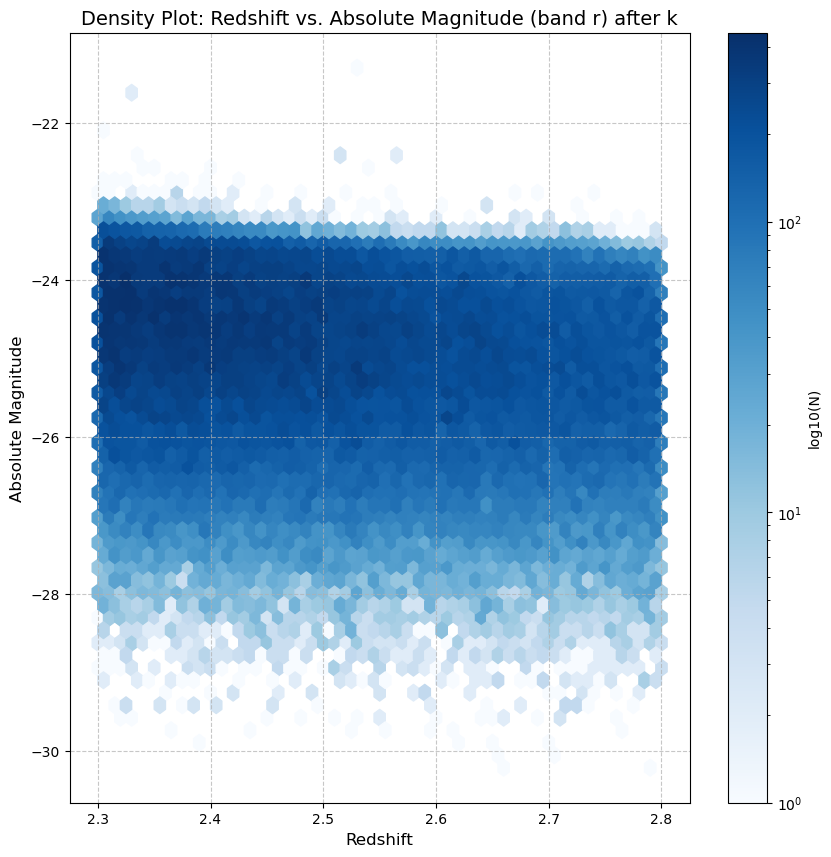

In [20]:
plt.figure(figsize=(10, 10))
plt.scatter(z, apr_mag_r-d-k_rr)
plt.title('Redshift vs. Absolute Magnitude (band r) after k - Subset', fontsize=14)
plt.xlabel('Redshift', fontsize=12)
plt.ylabel('Absolute Magnitude', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('/global/u1/z/zhaozhon/Plots/after_k_r', dpi=300)  # Saving the errorbar plot

# Creating and saving the hexbin plot
plt.figure(figsize=(10, 10))
plt.hexbin(z, apr_mag_r-d-k_rr, gridsize=50, cmap='Blues', bins='log')
plt.colorbar(label='log10(N)')
plt.title('Density Plot: Redshift vs. Absolute Magnitude (band r) after k', fontsize=14)
plt.xlabel('Redshift', fontsize=12)
plt.ylabel('Absolute Magnitude', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('/global/u1/z/zhaozhon/Plots/after_k_density_r', dpi=300)  # Saving the hexbin plot

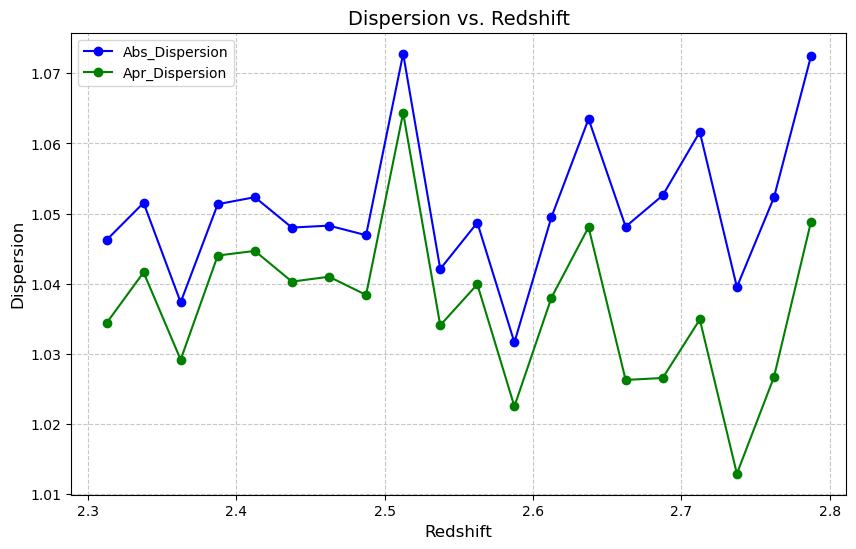

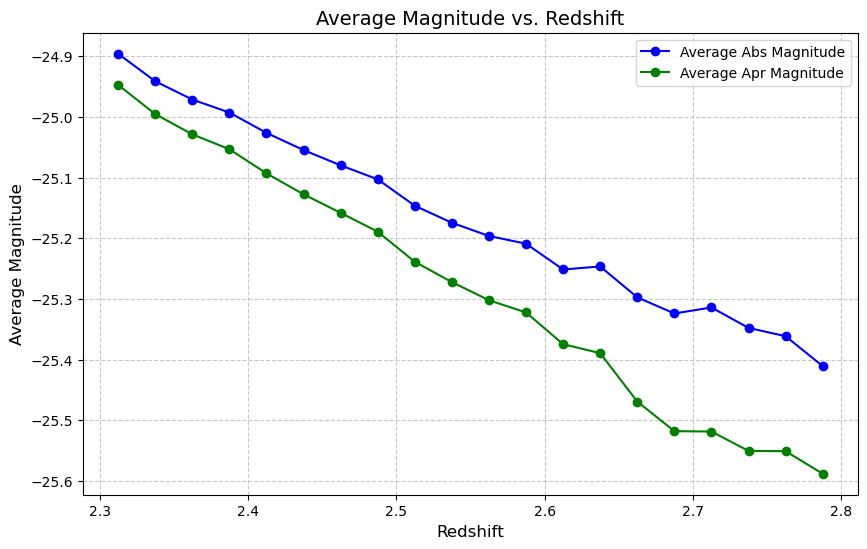

NameError: name 'average_magnitude' is not defined

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of bins for redshift
num_bins = 20
bin_edges = np.linspace(min(z), max(z), num_bins + 1)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])  # Midpoints of each bin

# Arrays to store average magnitude and dispersion
average_abs_magnitude = []
dispersion_abs_magnitude = []

# Loop through each redshift bin
for i in range(num_bins):
    # Select data points in the current bin
    bin_mask = (z >= bin_edges[i]) & (z < bin_edges[i + 1])
    bin_values = (apr_mag_r - d - k_rr)[bin_mask]
    
    # Calculate average magnitude and dispersion
    if len(bin_values) > 0:
        average_abs_magnitude.append(np.mean(bin_values))
        dispersion_abs_magnitude.append(np.std(bin_values))
    else:
        # Handle empty bins
        average_abs_magnitude.append(np.nan)
        dispersion_abs_magnitude.append(np.nan)

# Plotting Dispersion vs. Redshift
plt.figure(figsize=(10, 6))
plt.plot(bin_centers, dispersion_abs_magnitude, marker='o', linestyle='-', color='blue', label='Abs_Dispersion')
plt.plot(bin_centers, dispersion_apr_magnitude, marker='o', linestyle='-', color='green', label='Apr_Dispersion')

plt.title('Dispersion vs. Redshift', fontsize=14)
plt.xlabel('Redshift', fontsize=12)
plt.ylabel('Dispersion', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.savefig('/global/u1/z/zhaozhon/Plots/dispersion_vs_redshift', dpi=300)
plt.show()

# Plotting Average Magnitude vs. Redshift
plt.figure(figsize=(10, 6))
plt.plot(bin_centers, average_abs_magnitude, marker='o', linestyle='-', color='blue', label='Average Abs Magnitude')
plt.plot(bin_centers, average_apr_magnitude, marker='o', linestyle='-', color='green', label='Average Apr Magnitude')

plt.title('Average Magnitude vs. Redshift', fontsize=14)
plt.xlabel('Redshift', fontsize=12)
plt.ylabel('Average Magnitude', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.savefig('/global/u1/z/zhaozhon/Plots/average_vs_redshift', dpi=300)
plt.show()


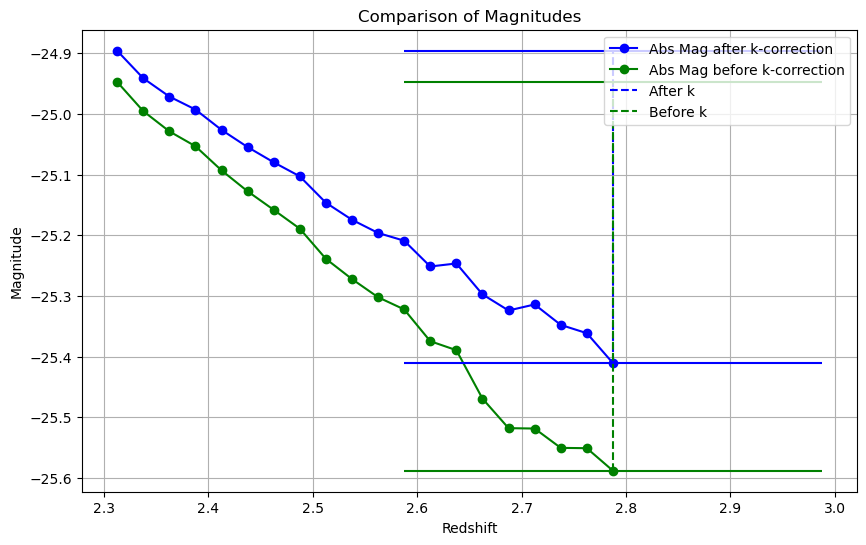

In [29]:
plt.figure(figsize=(10, 6))
average_abs_magnitude = np.array(average_abs_magnitude)
average_apr_magnitude = np.array(average_apr_magnitude)
abs_min = average_abs_magnitude.min()
abs_max = average_abs_magnitude.max()
apr_min = average_apr_magnitude.min()
apr_max = average_apr_magnitude.max()
# Indices of min and max
abs_min_idx = np.argmin(average_abs_magnitude)
abs_max_idx = np.argmax(average_abs_magnitude)
apr_min_idx = np.argmin(average_apr_magnitude)
apr_max_idx = np.argmax(average_apr_magnitude)
# Plot data
plt.plot(bin_centers, average_abs_magnitude, marker='o', linestyle='-', color='blue', label='Abs Mag after k-correction')
plt.plot(bin_centers, average_apr_magnitude, marker='o', linestyle='-', color='green', label='Abs Mag before k-correction')
# Add lines for abs magnitude
plt.vlines(bin_centers[abs_min_idx], abs_min, abs_max, color='blue', linestyle='--', label='After k')
plt.hlines([abs_min, abs_max], bin_centers[abs_min_idx] - 0.2, bin_centers[abs_min_idx] + 0.2, color='blue')
# Add lines for apr magnitude
plt.vlines(bin_centers[apr_min_idx], apr_min, apr_max, color='green', linestyle='--', label='Before k')
plt.hlines([apr_min, apr_max], bin_centers[apr_min_idx] - 0.2, bin_centers[apr_min_idx] + 0.2, color='green')
# Labels and legend
plt.xlabel("Redshift")
plt.ylabel("Magnitude")
plt.title("Comparison of Magnitudes")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Define the bins
num_bins = 20
bins = np.linspace(min(z), max(z), num_bins + 1)

# Digitize the data into bins
bin_indices = np.digitize(z, bins)

# Calculate the average absolute magnitude for each bin
avg_absolute_magnitude = []
for i in range(1, num_bins + 1):
    bin_mask = (bin_indices == i)
    if np.any(bin_mask):  # Check if there are elements in the bin
        avg_absolute_magnitude.append(np.mean(apr_mag_r[bin_mask] - d[bin_mask] - k_rr[bin_mask]))
    else:
        avg_absolute_magnitude.append(np.nan)  # If no elements in the bin, append NaN

# Plotting the average absolute magnitude for each bin
bin_centers = (bins[:-1] + bins[1:]) / 2

plt.figure(figsize=(10, 10))
plt.errorbar(bin_centers, avg_absolute_magnitude, fmt='o', color='blue', capsize=3, markersize=5, alpha=0.7, linestyle='-')
plt.title('Average Absolute Magnitude (band r) vs. Redshift after k-correction', fontsize=14)
plt.xlabel('Redshift', fontsize=12)
plt.ylabel('Average Absolute Magnitude', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('/global/u1/z/zhaozhon/Plots/avg_abs_mag_r', dpi=300)  # Saving the plot

# Showing the plot
plt.show()

In [ ]:
print(max(avg_absolute_magnitude)-min(avg_absolute_magnitude))

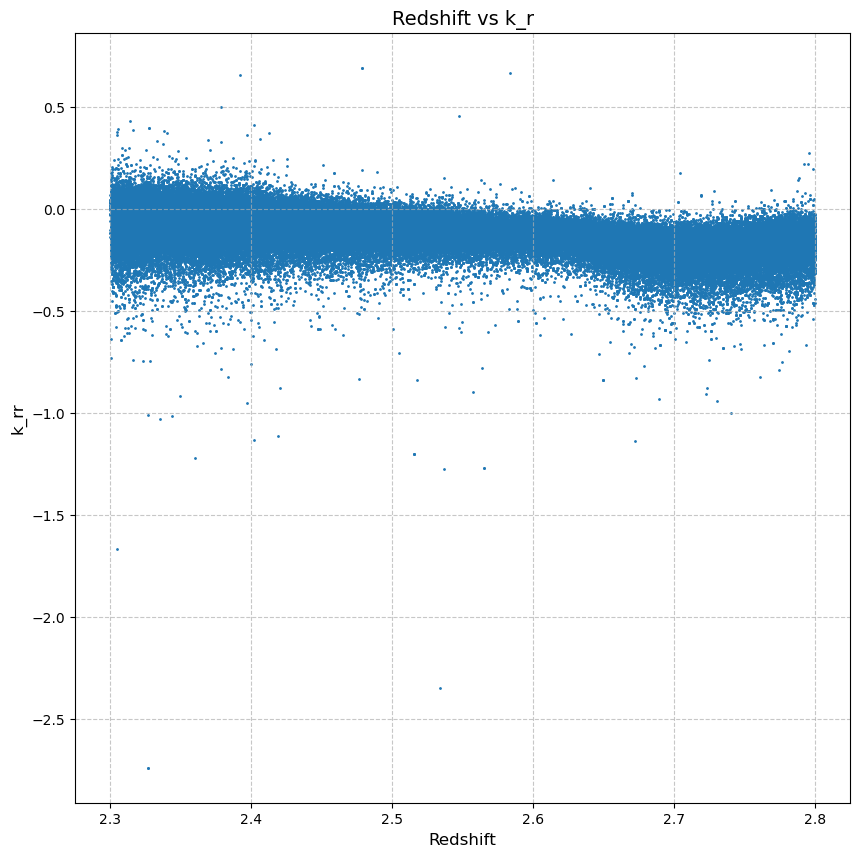

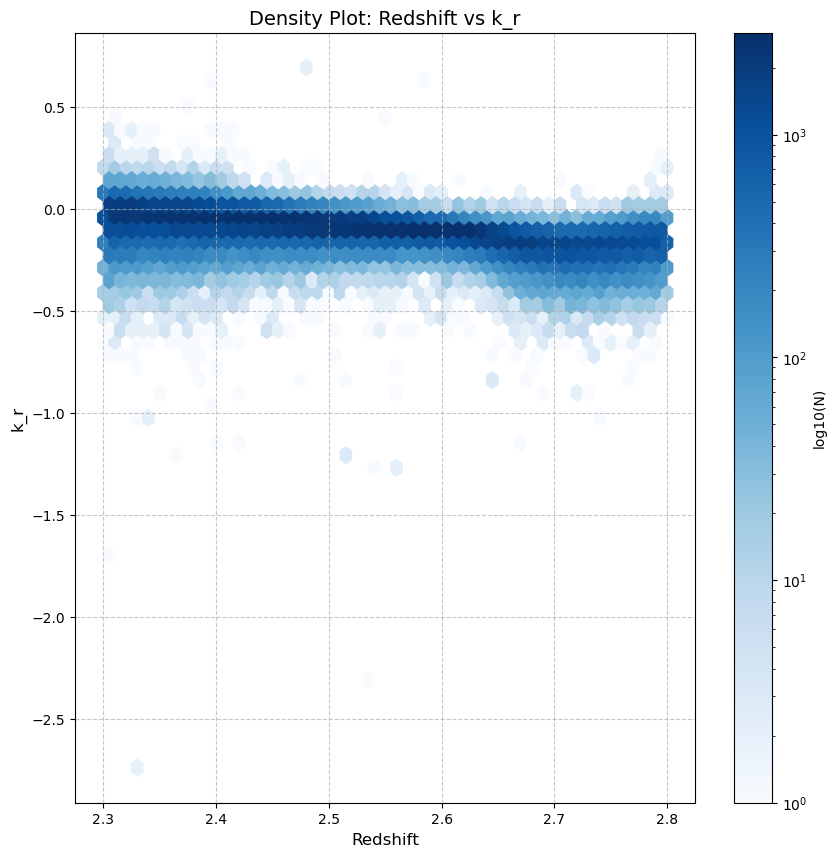

In [22]:
plt.figure(figsize=(10, 10))
plt.scatter(z, k_rr,s=1)
plt.title('Redshift vs k_r', fontsize=14)
plt.xlabel('Redshift', fontsize=12)
plt.ylabel('k_rr', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('/global/u1/z/zhaozhon/Plots/k_r1', dpi=300)  # Saving the errorbar plot

# Creating and saving the hexbin plot
plt.figure(figsize=(10, 10))
plt.hexbin(z, k_rr, gridsize=50, cmap='Blues', bins='log')
plt.colorbar(label='log10(N)')
plt.title('Density Plot: Redshift vs k_r', fontsize=14)
plt.xlabel('Redshift', fontsize=12)
plt.ylabel('k_r', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('/global/u1/z/zhaozhon/Plots/k_r2', dpi=300)  # Saving the hexbin plot